# Cat-Dog Image Data Preprocessing

<p><b>Status: <span style=color:orange;>In progress</span></b></p>

##### LOCATE FILE NAMES

In [1]:
import os

data_dir = '../../data/'
class_list = os.listdir(data_dir) # get classes based on folder names

filename_list = []

# make a list of the images' file names, cats and dogs
for _class in class_list:
    filename_list_class = os.listdir(data_dir + _class)
    filename_list_class = [(_class + '/' + fname) for fname in filename_list_class if fname.endswith('.jpg')]
    filename_list += filename_list_class
    

print('Total number of files : ', len(filename_list))
filename_list[:10]

Total number of files :  25000


['Cat/0.jpg',
 'Cat/1.jpg',
 'Cat/10.jpg',
 'Cat/100.jpg',
 'Cat/1000.jpg',
 'Cat/10000.jpg',
 'Cat/10001.jpg',
 'Cat/10002.jpg',
 'Cat/10003.jpg',
 'Cat/10004.jpg']

##### PREPARE TO STORE DATASET CHARACTERISTICS

In [2]:
import numpy as np

# this will store the information from every image
X = []  # feature
y = []  # labels

channels = 3         # three colors: RGB
image_size = 227     # image will be converted to 227x227 images

n_images = len(filename_list)

X = np.ndarray(shape=(n_images, image_size, image_size, channels), dtype=np.float32)

##### EXTRACT IMAGE INFORMATION
This block will read every image to resize them and store their labels


54 invalid file(s) were found

Printing the resulting dataset :

LABEL : Cat


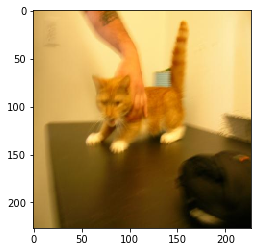

array([[[ 87., 164., 203.],
        [ 89., 166., 205.],
        [ 92., 169., 208.],
        ...,
        [121., 203., 244.],
        [123., 202., 241.],
        [121., 199., 239.]],

       [[ 87., 164., 203.],
        [ 89., 166., 205.],
        [ 92., 169., 208.],
        ...,
        [122., 205., 243.],
        [123., 202., 241.],
        [121., 200., 240.]],

       [[ 87., 164., 203.],
        [ 89., 166., 205.],
        [ 92., 169., 208.],
        ...,
        [123., 205., 243.],
        [124., 203., 242.],
        [122., 201., 240.]],

       ...,

       [[ 56., 123., 154.],
        [ 56., 124., 154.],
        [ 58., 124., 156.],
        ...,
        [  1.,   2.,   2.],
        [  1.,   2.,   2.],
        [  1.,   2.,   2.]],

       [[ 55., 122., 153.],
        [ 55., 122., 153.],
        [ 56., 123., 154.],
        ...,
        [  0.,   2.,   2.],
        [  0.,   2.,   2.],
        [  0.,   2.,   2.]],

       [[ 53., 120., 151.],
        [ 54., 121., 152.],
        [ 55., 1


Raw data (first image):


In [3]:
%matplotlib inline
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import cv2

# this will try to deploy a progress bar
try:
    from tqdm.notebook import tqdm
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x

# make a list for the name of failed files
fail_dir_list = []
fail_idx_list = []

# count the number of valid images read
img_counter = 0

for f in tqdm(range(len(filename_list))):
    try:
        # read every image
        img_path = data_dir + filename_list[f]
        img = np.array(cv2.imread(img_path))
        
        # resize every image to the desired size
        img = cv2.resize(img,(image_size,image_size))
        
        # build the list with feature data [RGB values]
        X[img_counter, :, :, :] = img
        
        # split image directory name
        fname_split = filename_list[f].split('/')  # =[Cat, 10.jpg] example
        
        # build the list with labels [cats | dogs]
        class_name = fname_split[0]
        y.append(class_name)
        
        # raise valid image counter if no error ocurred
        img_counter += 1
        
    
    except Exception as e:
        # log names and indices of files with errors
        fail_dir_list.append(filename_list[f])
        fail_idx_list.append(f)
        pass

# remove empty arrays
X = X[:img_counter]

print('{} invalid file(s) were found\n'.format(len(fail_dir_list)))
print('Printing the resulting dataset :\n')

# plot a sample from the list of images [features]
print('LABEL : ' + y[0])
plt.imshow(cv2.cvtColor(X[0], cv2.COLOR_BGR2RGB).astype(np.uint8))
plt.show()

print('\nRaw data (first image):')
X[0]

##### OUTPUT FEATURES DIMENSIONS

In [4]:
print('samples, width, height, channels')
X.shape

samples, width, height, channels


(24946, 227, 227, 3)

##### DATA AUGMENTATION

##### STORE THE PREPROCESSED DATASET

In [5]:
out_folder = 'output'
variations = ['color', 'gray']

# check if class folder already exits, if not create them
for v in variations:
    for c in class_list:
        new_folder_dir = '{}/{}/{}'.format(out_folder, v, c)
        if not os.path.exists(new_folder_dir):
            os.makedirs(new_folder_dir)

# empty each class folder

# write each preprocessed image
for i in tqdm(range(X.shape[0])):
    cv2.imwrite('{}/{}/{}/{}.jpg'.format(out_folder, 'color', y[i], i), X[i]) 
    
    img_gray = cv2.cvtColor(X[i], cv2.COLOR_BGR2GRAY)
    cv2.imwrite('{}/{}/{}/{}.jpg'.format(out_folder, 'gray', y[i], i), X[i])  

print('preprocess data has been saved succesfully! please check "output/" folder')


preprocess data has been saved succesfully! please check "output/" folder
